In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
main = pd.read_csv('./master.csv', sep=',', encoding='cp1250', header=1, 
                   names = ['country', 'year', 'sex', 'age', 'suicide_no', 'population', 
                            'suicide_per_100k', 'country_year', 'HDI', 'GDP', 'GDP_per_capita', 'generation'])
main.replace('', np.nan, inplace=True)
df = main

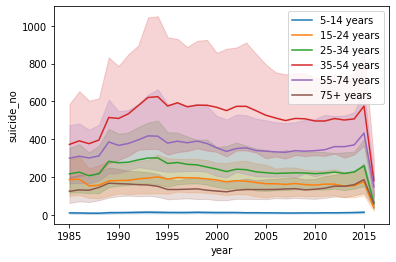

In [3]:
#naraščanje in padanje števila samomorov po starostnih skupinah
age_15 = main.loc[main.loc[:, 'age']=='15-24 years',:]
age_35 = main.loc[main.loc[:, 'age']=='35-54 years',:]
age_75 = main.loc[main.loc[:, 'age']=='75+ years',:]
age_25 = main.loc[main.loc[:, 'age']=='25-34 years',:]
age_55 = main.loc[main.loc[:, 'age']=='55-74 years',:]
age_5 = main.loc[main.loc[:, 'age']=='5-14 years',:]
p = sns.lineplot(x='year', y='suicide_no', data=age_5)
q = sns.lineplot(x='year', y='suicide_no', data=age_15)
r = sns.lineplot(x='year', y='suicide_no', data=age_25)
s = sns.lineplot(x='year', y='suicide_no', data=age_35)
t = sns.lineplot(x='year', y='suicide_no', data=age_55)
u = sns.lineplot(x='year', y='suicide_no', data=age_75)

plt.legend(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']);

#Vidimo da je daleč največ samomorov v starejših skupinah, ampak na srečo število samomorov pada v vseh starostnih skupinah.

In [4]:
#države z najvišjim številom samomorov na 100k ljudi v vsaki starostni skupini
age_groups = main.age.unique().tolist()
for age_group in age_groups: 
    print("Top 3 countries with highest average suicide rate for", age_group)
    print(pd.DataFrame(main.groupby(['country','age'])['suicide_per_100k'].mean()).reset_index().\
    sort_values(['age','suicide_per_100k']).groupby('age').get_group(age_group).\
    sort_values('suicide_per_100k', ascending=False).head(5))
    print()
#Največkrat se pojavijo države vzhodne Evrope in Azije, kjer so pogoji za življenje slabši kot v zahodni Evropi in Ameriki.

Top 3 countries with highest average suicide rate for 35-54 years
                country          age  suicide_per_100k
314           Lithuania  35-54 years         61.289773
68              Belarus  35-54 years         44.293571
451  Russian Federation  35-54 years         44.052407
242             Hungary  35-54 years         40.635000
308              Latvia  35-54 years         39.603810

Top 3 countries with highest average suicide rate for 15-24 years
                country          age  suicide_per_100k
521           Sri Lanka  15-24 years         37.480455
312           Lithuania  15-24 years         25.617500
449  Russian Federation  15-24 years         25.338148
282          Kazakhstan  15-24 years         25.083846
234              Guyana  15-24 years         24.485600

Top 3 countries with highest average suicide rate for 75+ years
               country        age  suicide_per_100k
245            Hungary  75+ years         81.673462
442  Republic of Korea  75+ years     

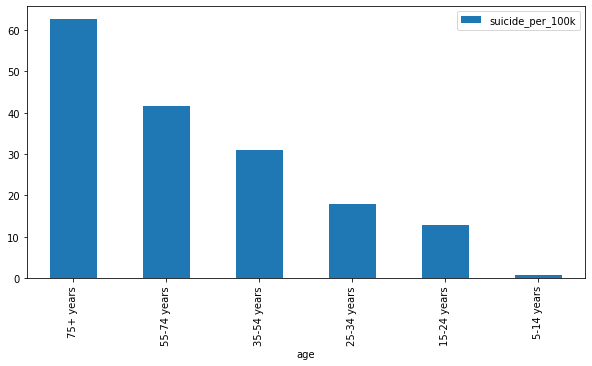

In [5]:
#slovenci se res slabo staramo
df = main[['country','age','suicide_per_100k']]
df = df.loc[df['country'] == 'Slovenia'].reset_index(drop=True)
df = df.groupby(['age'], as_index=False).mean().sort_values(by=['suicide_per_100k'], ascending=False)
df.plot(kind='bar', x='age', figsize=(10,5));
#V prejšnih tabelah smo videli tudi Slovenijo, zato smo pogledali kakšno je stanje v naši državi. 
#Največ jih je v najstarejših obdobjih življenja, kar postavi vprašanje ali nudimo premalo pozornosti starejšim prebivalcem države.

In [6]:
df = main
#most prone to suicide
pd.Series(df.groupby(['country']).suicide_no.mean().sort_values(ascending=False).head(10).index.tolist() + \
df.groupby(['country']).suicide_no.sum().sort_values(ascending=False).head(10).index.tolist() + \
df.groupby(['country'])['suicide_per_100k'].mean().sort_values(ascending=False).head(10).index.tolist() + \
df.groupby(['country'])['suicide_per_100k'].sum().sort_values(ascending=False).head(10).index.tolist()).value_counts()
#S podatki s spletne strani International Labour Organization (ILO), smo si pomagali ugotoviti kaj bi lahko vplivalo na število samomorov
#Rusija ima zaposlenost napram populaciji 59.5%, nezaposlenost 5.2%, nezaposlenost mladih 16.3% in razmerje zdravstvenih stroškov, ki jih ne plača državljan, 58.2%
#Ukrajina ima podobno razmerje 56.7%, nezaposlenost 9.5%, nezaposlenost maldih 18.9% in razmerje zastonj zdravstva 58.5%
#Maldivi na drugi strani imajo zaposlenost-populaciji na 42%, nezaposlenost starejših na 11.2% in mladih 17.6% ter razmerje kritja zdravstvenih stroškov 20.8%
#Aint Kitts and Nevis imajo podatek zgolj o kritju zdravstvenih stroškov in sicer 58.2%.
#Testna množica seveda ni dovolj velika, da bi lahko pravilno sklepali, vendar vseno lahko pomislimo, da zaposlenost in zdravstveni stroški ne vplivajo na število samomorov v državah.

Russian Federation    4
Ukraine               4
Japan                 3
Republic of Korea     3
Poland                2
United States         2
Brazil                2
Lithuania             2
Kazakhstan            2
Germany               2
Hungary               2
Sri Lanka             2
France                2
Belgium               1
Slovenia              1
Finland               1
United Kingdom        1
Belarus               1
Latvia                1
Estonia               1
Austria               1
dtype: int64

In [4]:
#least prone to suicide
pd.Series(df.groupby(['country']).suicide_no.mean().sort_values().head(10).index.tolist() + \
df.groupby(['country']).suicide_no.sum().sort_values().head(10).index.tolist() + \
df.groupby(['country'])['suicide_per_100k'].mean().sort_values().head(10).index.tolist() + \
df.groupby(['country'])['suicide_per_100k'].sum().sort_values().head(10).index.tolist()).value_counts()
#

Maldives                        4
Saint Kitts and Nevis           4
Dominica                        4
Oman                            3
San Marino                      3
Antigua and Barbuda             3
United Arab Emirates            2
Bahamas                         2
Jamaica                         2
Macau                           2
Cabo Verde                      2
Grenada                         2
Kiribati                        2
Kuwait                          1
Bosnia and Herzegovina          1
Saint Vincent and Grenadines    1
South Africa                    1
Seychelles                      1
dtype: int64

In [9]:
#random forrest
df = main
df.drop('HDI',axis=1, inplace=True)
df.isnull().sum()
#Odstrani vejice iz nizov
df['GDP'] = df['GDP'].str.replace(",", "")

#Spremeni nize v številke
df['GDP'] = pd.to_numeric(df['GDP'])

In [5]:
# Encoding of cat variables with LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for x in ['country','sex','age','country_year','generation']:
    df[x] = le.fit_transform(df[x])

In [11]:
# Split dataset into X and y
y = df[['suicide_no']].values
X = df.drop('suicide_no',axis=1).values

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
rfr = RandomForestRegressor(random_state=42)

# Average RMSE of 5 fold cross validation
cross_val_score(rfr, X, y, cv=5).mean()


/home/lady_gaga/PycharmProjects/prProjekt/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/lady_gaga/PycharmProjects/prProjekt/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/lady_gaga/PycharmProjects/prProjekt/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/lady_gaga/PycharmProjects/prProjekt/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-v

0.8801200901119245

In [18]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfr.fit(X,y), random_state=42).fit(X, y)
eli5.show_weights(perm, feature_names = df.drop('suicide_no',axis=1).columns.tolist(),top=10)


/home/lady_gaga/PycharmProjects/prProjekt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Weight,Feature
1.6361 ± 0.0612,population
1.2075 ± 0.0337,suicide_per_100k
0.0028 ± 0.0009,generation
0.0020 ± 0.0003,GDP
0.0012 ± 0.0002,country_year
0.0010 ± 0.0001,country
0.0003 ± 0.0001,year
0.0003 ± 0.0001,GDP_per_capita
0.0002 ± 0.0001,age
0.0000 ± 0.0000,sex
